<a href="https://colab.research.google.com/github/cappelchi/Rosalind/blob/master/Rosalind_Tasks_22_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tutorialspoint.com/biopython/biopython_quick_guide.htm

In [0]:
!pip install biopython
import sys
print(sys.version)
import numpy as np
import pandas as pd

from Bio.SeqIO import parse 
from Bio.SeqRecord import SeqRecord 
from Bio.Seq import Seq 
from Bio.Alphabet import single_letter_alphabet 
from Bio.Alphabet import generic_protein 
from Bio.Alphabet import generic_nucleotide 
from Bio.Alphabet import generic_dna 
from Bio.Alphabet import generic_rna
from Bio.Alphabet import IUPAC 
from Bio.Data import IUPACData 
from Bio.SeqUtils import GC 
from Bio.Seq import transcribe
from Bio.Seq import translate
from Bio import pairwise2
from Bio import motifs 
from Bio import SeqIO
from Bio import ExPASy
from Bio.Data import CodonTable
import operator as op
from functools import reduce

     |████████████████████████████████| 2.2MB 4.9MB/s 
3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


####Task 22 RNA Splicing

**Problem**
After identifying the exons and introns of an RNA string, we only need to delete the introns and concatenate the exons to form a new string ready for translation.

Given: A DNA string s (of length at most 1 kbp) and a collection of substrings of s acting as introns. All strings are given in FASTA format.

Return: A protein string resulting from transcribing and translating the exons of s. (Note: Only one solution will exist for the dataset provided.)

In [0]:
dna_string = Seq('ATGGTCTACATAGCTGACAAACAGCACGTAGCAATCGGTCGAATCTCGAGAGGCATATGGTCACATGATCGGTCGAGCGTGTTTCAAAGTTTGCGCCTAG')
introns = [Seq('ATCGGTCGAA'), Seq('ATCGGTCGAGCGTGT')]

In [0]:
dna_string.find(introns[2])

901

In [0]:
!ls

rosalind_splc.txt  sample_data


In [0]:
records = []
rosalind_file = 'rosalind_splc.txt'
with open(rosalind_file, 'r') as inf:
    for record in SeqIO.parse(inf, "fasta"):        
        records.append(record.seq)
dna_string = records[0]
introns = records[1:]
print("length = ", len(dna_string), 'introns = ', len(introns))

length =  1000 introns =  15


In [0]:
for cnt, intron in enumerate(introns):
    #print('intron num =', cnt)
    #print('intron pos =', dna_string.find(intron))
    while dna_string.find(intron) != -1:
        #print('intron pos =', dna_string.find(intron), 'intron length = ', len(intron))
        dna_string = dna_string[0:dna_string.find(intron)] + dna_string[dna_string.find(intron) + len(intron):]

protein = dna_string.translate(to_stop=True)
print(str(protein))

MGQASNNSLTYDTVISHRRSLASISGLPHAMFKRPIPDSLTANLQRVSSGGTFGNLALREYTLVLQVRLSRGSCCRQTTGFHTIAQGVPCSRIPSKHKYGFYKTQHAKSDLHSCCDSRGGLVVVVRREPNISEGIGVCEALVAISWGNEIPVVQFPRILSRAVFISSQGVSQISTPYMALVLWWS


####Task 23 Enumerating k-mers Lexicographically

**Problem**
Assume that an alphabet A has a predetermined order; that is, we write the alphabet as a permutation A=(a1,a2,…,ak), where a1<a2<⋯<ak. For instance, the English alphabet is organized as (A,B,…,Z).

Given two strings s and t having the same length n, we say that s precedes t in the lexicographic order (and write s<Lext) if the first symbol s[j] that doesn't match t[j] satisfies sj<tj in A.

Given: A collection of at most 10 symbols defining an ordered alphabet, and a positive integer n (n≤10).

Return: All strings of length n that can be formed from the alphabet, ordered lexicographically (use the standard order of symbols in the English alphabet).

In [0]:
alphabet = ['A', 'C', 'G', 'T']
N = 2

In [0]:
from itertools import combinations_with_replacement, permutations, product

In [0]:
rosalind = 'ABCDEF'
ordered=[]
for i in range(len(rosalind)):    
    for item in combinations_with_replacement(rosalind, 3):
        string = ''.join(item)
        if string[0] == rosalind[0]:
            ordered.append(''.join(item))
    rosalind = rosalind[1:] + rosalind[0]
    #print('rosalind =', rosalind)

In [0]:
rosalind = 'ABCD'
for perm in product(rosalind, repeat=4):
    print(''.join(perm))

####Task 24 Longest Increasing Subsequence

**Problem**
A subsequence of a permutation is a collection of elements of the permutation in the order that they appear. For example, (5, 3, 4) is a subsequence of (5, 1, 3, 4, 2).

A subsequence is increasing if the elements of the subsequence increase, and decreasing if the elements decrease. For example, given the permutation (8, 2, 1, 6, 5, 7, 4, 3, 9), an increasing subsequence is (2, 6, 7, 9), and a decreasing subsequence is (8, 6, 5, 4, 3). You may verify that these two subsequences are as long as possible.

Given: A positive integer n≤10000 followed by a permutation π of length n.

Return: A longest increasing subsequence of π, followed by a longest decreasing subsequence of π.

In [0]:
!ls

rosalind_lgis.txt  sample_data


In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
inc_net = nx.DiGraph()
type(inc_net)

networkx.classes.digraph.DiGraph

In [0]:
ros_list = [5, 1, 4, 2, 3]
ros_ind = [2, 4, 5, 3, 1]
array = np.zeros(len(ros_list) + 1)
for num, element in enumerate(ros_list):
    if num < 10:
        print (element, num)
    if element == 0:
        print ('0', element, num)
    array[element] = int(num)

In [0]:
my_edges = [(i + 1, ros_list[int(v)])  for i in range(1, len(ros_list) - 1) for v in array[i + 1:] if v > array[i]] 
my_edges_dec = [(i, ros_list[int(v)])  for i in range(len(ros_list), 1, -1) for v in array[1:i] if v > array[i]] 

In [0]:
my_edges = []
print(array)
for i in range(len(ros_list), 1, -1):
    print ('i = ', i )
    for v in array[1:i]:
        print('v = ', array[1:i])
        if v > array[i]:
            print('int(v) = ', int(v))
            my_edges.append((i, ros_list[int(v)]))
            print ('add = ', i, ros_list[int(v)])
            #print (i + 1, ros_list[v - 1])
print(my_edges)

In [0]:
inc_net.add_nodes_from(ros_list)
inc_net.add_edges_from(my_edges)

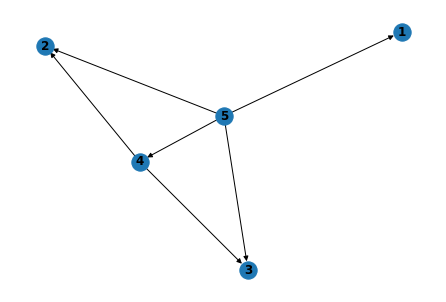

In [0]:
nx.draw(inc_net, with_labels=True, font_weight='bold')

In [0]:
nx.dag_longest_path(inc_net)

[5, 4, 3]

In [0]:
records = []
rosalind_file = 'rosalind_lgis.txt'
with open(rosalind_file, 'r') as inf:
    for line in inf:
        l = line.strip().split()
        records = line.strip().split() 
        #print(line.strip().split())
        
    #records = inf.read()
    #for record in inf:        
    #    records.append(record)
    

In [0]:
ros_list = []
for element in records:
    #print (int(element))
    ros_list.append(int(element))
    
array = np.zeros(len(ros_list) + 1)

for num, element in enumerate(ros_list):
    if num < 10:
        print (element, num)
    if element == 0:
        print ('0', element, num)
    array[element] = int(num)

3757 0
1527 1
7884 2
5156 3
7571 4
4354 5
8079 6
3453 7
3903 8
7313 9


In [0]:
array

array([0., 1., 3., 4., 2., 0.])

In [0]:
my_edges = []
my_edges = [(i, ros_list[int(v)])  for i in range(1, len(ros_list) - 1) for v in array[i + 1:] if v > array[i]]   

In [0]:
inc_net = nx.DiGraph()
type(inc_net)
inc_net.add_nodes_from(ros_list)
inc_net.add_edges_from(my_edges)

In [0]:
#nx.draw(inc_net, with_labels=True, font_weight='bold')

In [0]:
inc_path = nx.dag_longest_path(inc_net)

In [0]:
inc_path

In [0]:
len(inc_path)

180

In [0]:
path_i = ''
for part in inc_path:
    print (part, end = ' ')

16 64 329 388 406 407 473 479 534 635 649 704 725 805 860 885 904 911 975 1149 1188 1194 1407 1428 1539 1669 1696 1778 1802 1806 1854 1898 1983 2019 2032 2050 2118 2322 2348 2360 2401 2412 2541 2718 2726 2808 2862 2898 3000 3110 3162 3182 3258 3310 3343 3398 3408 3409 3488 3616 3645 3664 3668 3680 3681 3682 3729 3749 3846 3974 4022 4087 4112 4146 4167 4251 4316 4331 4340 4490 4568 4625 4734 4800 4801 4821 4853 4870 4997 5045 5059 5063 5107 5185 5396 5417 5435 5437 5482 5566 5657 5669 5684 5691 5745 5765 5796 5883 5889 5900 5912 5960 5978 6010 6159 6174 6209 6211 6289 6337 6364 6378 6386 6447 6452 6563 6570 6571 6597 6612 6689 6700 6742 6790 6896 6926 6971 7011 7027 7033 7041 7049 7071 7136 7159 7166 7225 7252 7295 7356 7381 7430 7432 7489 7515 7521 7542 7648 7662 7725 7745 7765 7777 7800 7804 7867 7908 7961 7976 7992 8047 8147 8164 8197 8321 8462 8546 8634 8694 8809 

In [0]:
my_edges_dec = []
my_edges_dec = [(i, ros_list[int(v)])  for i in range(len(ros_list), 1, -1) for v in array[1:i] if v > array[i]] 

In [0]:
dec_net = nx.DiGraph()
type(dec_net)
dec_net.add_nodes_from(ros_list)
dec_net.add_edges_from(my_edges_dec)

In [0]:
dec_path = nx.dag_longest_path(dec_net)

In [0]:
len(dec_path)

181

In [0]:
path_d = ''
for part in dec_path:
    print (part, end = ' ')

8763 8753 8723 8719 8614 8593 8587 8476 8466 8448 8403 8400 8387 8356 8353 8308 8252 8187 8171 8140 8093 8005 7968 7960 7955 7953 7934 7861 7825 7781 7764 7750 7732 7731 7685 7684 7614 7477 7459 7454 7440 7406 7387 7379 7334 7315 7291 7186 7171 7127 7114 7081 7013 6985 6861 6741 6736 6617 6587 6584 6454 6404 6336 6323 6103 6071 6034 5990 5877 5815 5761 5758 5595 5487 5462 5380 5268 5240 4875 4853 4819 4559 4501 4469 4467 4311 4121 4120 4062 3995 3990 3955 3946 3897 3802 3687 3669 3655 3646 3618 3600 3511 3510 3463 3368 3361 3326 3281 3226 3128 2942 2919 2886 2875 2865 2863 2857 2805 2800 2795 2782 2667 2654 2640 2498 2417 2408 2379 2351 2334 2314 2308 2134 2096 2015 1818 1681 1678 1645 1640 1599 1585 1563 1540 1518 1430 1352 1338 1291 1288 1266 1261 1256 1251 1245 1209 1093 1072 1026 982 943 934 856 850 791 785 783 729 671 617 614 613 587 578 465 432 351 297 283 242 157 